In [1]:
!pip install -U spacy
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_ner_bc5cdr_md-0.5.3.tar.gz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 97.7 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/Shareddrives/Riset 2023/DataKratomGraph.csv")
df.head()

,abstract
0,"Mitragyna speciosa Korth also known as kratom,..."
1,"Mitragynine, an analgesic alkaloid from the pl..."
2,Kratom (Mitragyna speciosa) is a Southeast Asi...
3,BACKGROUND: Consumption of kratom (Mitragyna s...
4,Introduction: Chronic neuropathic pain is as a...


In [4]:
number_of_samples = 395
sample_transcription = df['abstract'].iloc[:number_of_samples]
print(sample_transcription[:1000]) # prints just the first 1000 characters

0      Mitragyna speciosa Korth also known as kratom,...
1      Mitragynine, an analgesic alkaloid from the pl...
2      Kratom (Mitragyna speciosa) is a Southeast Asi...
3      BACKGROUND: Consumption of kratom (Mitragyna s...
4      Introduction: Chronic neuropathic pain is as a...
                             ...                        
390    We examined the use of Kratom (Mitragyna sp.),...
391    In Thailand, there are four Mitragyna species;...
392    Administration of the aqueous extract of Mitra...
393    Kratom (Mitragyna speciosa) is a tropical plan...
394    The kratom story in Malaysia is a bit intricat...
Name: abstract, Length: 395, dtype: object


In [5]:
import scispacy
import spacy
nlp = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.10/dist-packages/spacy/language.py:2141: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [6]:
for text in sample_transcription:
    doc = nlp(text)
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)

toxicity 261 269 DISEASE
toxicity 344 352 DISEASE
Mitragynine 389 400 CHEMICAL
uric acid 977 986 CHEMICAL
toxicity 1272 1280 DISEASE
Mitragynine 0 11 CHEMICAL
morphine 135 143 CHEMICAL
pain 260 264 DISEASE
mitragynine 299 310 CHEMICAL
mitragynine 384 395 CHEMICAL
tryptamine 830 840 CHEMICAL
mitragynine 954 965 CHEMICAL
stereoisomer 974 986 CHEMICAL
speciogynine 988 1000 CHEMICAL
tryptamine 1056 1066 CHEMICAL
secologanin 1071 1082 CHEMICAL
mitragynine 1206 1217 CHEMICAL
alkaloids 1493 1502 CHEMICAL
terpenes 1507 1515 CHEMICAL
agitation 695 704 DISEASE
ingestions 817 827 DISEASE
neuropathic pain 22 38 DISEASE
neuropathic pain 174 190 DISEASE
nausea 286 292 DISEASE
dizziness 294 303 DISEASE
chronic pain 545 557 DISEASE
Cannabis sativa 587 602 CHEMICAL
cannabis 878 886 CHEMICAL
chronic pain 1058 1070 DISEASE
cannabis 1196 1204 CHEMICAL
pain 1217 1221 DISEASE
cannabis 1223 1231 CHEMICAL
pain 1236 1240 DISEASE
pain 1262 1266 DISEASE
cannabis 1272 1280 CHEMICAL
chronic pain 1285 1297 DISEASE


In [ ]:
import pandas as pd
import spacy

# Inisialisasi list untuk menyimpan hasil ekstraksi entitas
entities = []

# Ekstraksi entitas dari setiap teks dalam sample_transcription
for text in sample_transcription:
    doc = nlp(text)
    for ent in doc.ents:
        entities.append([ent.text, ent.start_char, ent.end_char, ent.label_])

# Buat DataFrame dari hasil ekstraksi entitas
entities_df = pd.DataFrame(entities, columns=["Entity", "Start Char", "End Char", "Label"])

entities_df = entities_df.drop_duplicates(subset=["Entity", "Start Char", "End Char", "Label"])
# Simpan DataFrame ke dalam file CSV
entities_df.to_csv("/content/drive/MyDrive/Text Classification 2023/extracted_entities.csv", index=False)

print("Hasil ekstraksi entitas telah disimpan ke dalam 'extracted_entities.csv'")


KeyboardInterrupt: 

In [ ]:
from spacy import displacy
print(doc)
displacy.render(doc[:1000], style='ent', jupyter=True)

The kratom story in Malaysia is a bit intricate. Kratom (Mitragyna speciosa Korth) or by the local name ketum is a local plant where ‘mitragynine’ (alkaloid in kratom leaves) is listed as a psychotropic substance under the Malaysian Poison Act 1952. The law states that any activity related to possessing, selling, using, transporting, processing, importing, or exporting kratom is considered illegal and can be prosecuted. Interestingly, kratom trees are not illegal plants and no laws in Malaysia forbid the cultivation or the presence of naturally growing kratom. On the prosecution side, the current laws do little to prosecute kratom addicts for rehabilitation due to no available kratom test kits which can assist the enforcement agency to arrest and prosecute kratom addicts. Therefore, the enforcement of law on kratom has been largely applied for transporting, processing and selling. Though the Poison Act cannot stop anyone who wants to plant or grow kratom, there are land laws that prohi

In [ ]:
from spacy.matcher import Matcher

pattern = [{'ENT_TYPE':'CHEMICAL'}, {'LIKE_NUM': True}, {'IS_ASCII': True}]
matcher = Matcher(nlp.vocab)
matcher.add("DRUG_DOSE", [pattern])


In [ ]:
document_index = 0
for transcription in df['abstract']:
    doc = nlp(transcription)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        print(string_id, start, end, span.text)

DRUG_DOSE 95 98 , 5,
DRUG_DOSE 97 100 , 10,
DRUG_DOSE 99 102 , 13,
DRUG_DOSE 101 104 , 15 or
DRUG_DOSE 160 163 , 2.5,
DRUG_DOSE 345 348 , 8,
DRUG_DOSE 126 129 ± 2.50 GAE
DRUG_DOSE 197 200 ± 297.2 ng/mL
DRUG_DOSE 214 217 ± 382.5 ng/mL
DRUG_DOSE 193 196 ± 1.6 ng/ml
DRUG_DOSE 223 226 ± 0.5 h.
DRUG_DOSE 79 82 , 5 and
DRUG_DOSE 134 137 ± 0.2 L/hr/kg
DRUG_DOSE 211 214 ± 0.01 min-1
DRUG_DOSE 230 233 ± 0.02 min-1
DRUG_DOSE 115 118 , 5,
DRUG_DOSE 118 121 or 10 mg/kg
DRUG_DOSE 62 65 acid 3 

DRUG_DOSE 73 76 acid 3 beta-O-beta-D-quinovopyranoside(II
DRUG_DOSE 80 83 acid 3 beta-O-beta-D-glucopyranoside(III
DRUG_DOSE 271 274 WRL 68,
DRUG_DOSE 172 175 VI 60'
DRUG_DOSE 246 249 ± 1.30,
DRUG_DOSE 251 254 ± 1.31,
DRUG_DOSE 121 124 Mitragynine 5,
DRUG_DOSE 146 149 SB 203580,


In [ ]:
from spacy import displacy
displacy.render(next(doc.sents), style='dep', jupyter=True)

In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Load extracted entities (predictions) and ground truth data
predicted_df = pd.read_csv("/content/drive/MyDrive/Text Classification 2023/extracted_entities1.csv")
ground_truth_df = pd.read_csv("/content/drive/MyDrive/Text Classification 2023/ground_truth_entities.csv")

# Merge the predicted and ground truth dataframes on matching entity characteristics
merged_df = pd.merge(predicted_df, ground_truth_df, on=['Entity', 'Start Char', 'End Char'], suffixes=('_pred', '_true'))

# True Positives (correctly predicted entities)
tp = merged_df[merged_df['Label_pred'] == merged_df['Label_true']].shape[0]

# False Positives (predicted entities that do not exist in the ground truth)
fp = predicted_df.shape[0] - tp

# False Negatives (entities in the ground truth that were not predicted)
fn = ground_truth_df.shape[0] - tp

# Precision, Recall, F1 Score, and Accuracy
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
accuracy = tp / ground_truth_df.shape[0] if ground_truth_df.shape[0] > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")


Precision: 0.17
Recall: 0.99
F1 Score: 0.29
Accuracy: 0.99


In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

              precision    recall  f1-score   support

    CHEMICAL       0.99      1.00      1.00       330
     DISEASE       1.00      0.99      1.00       261

    accuracy                           1.00       591
   macro avg       1.00      1.00      1.00       591
weighted avg       1.00      1.00      1.00       591



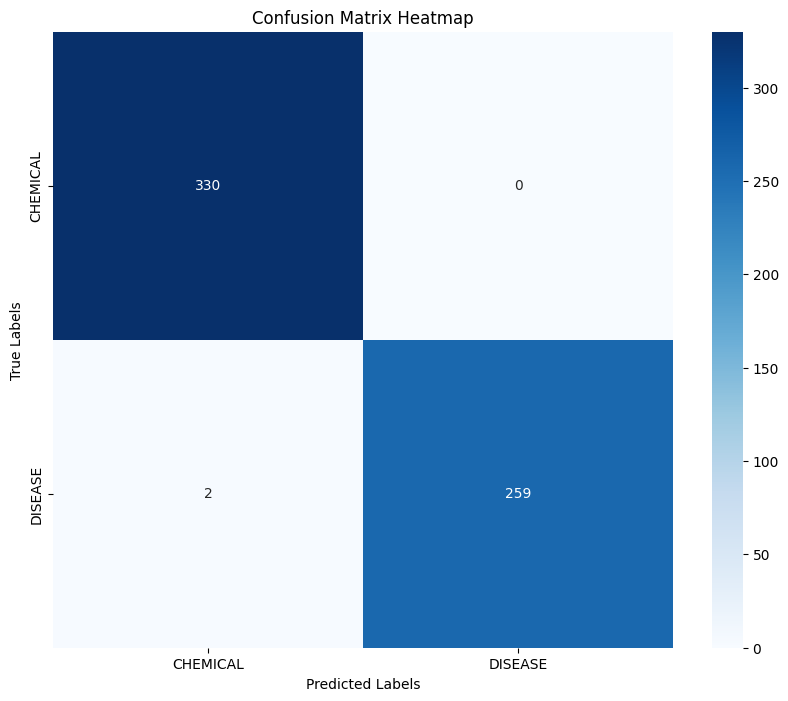

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the predicted and ground truth dataframes on matching entity characteristics
merged_df = pd.merge(predicted_df, ground_truth_df, on=['Entity', 'Start Char', 'End Char'], suffixes=('_pred', '_true'))

# Extract the labels
y_true = merged_df['Label_true']
y_pred = merged_df['Label_pred']

# Create a confusion matrix
labels = sorted(list(set(y_true) | set(y_pred)))
conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

# Display the classification report
print(classification_report(y_true, y_pred, target_names=labels))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


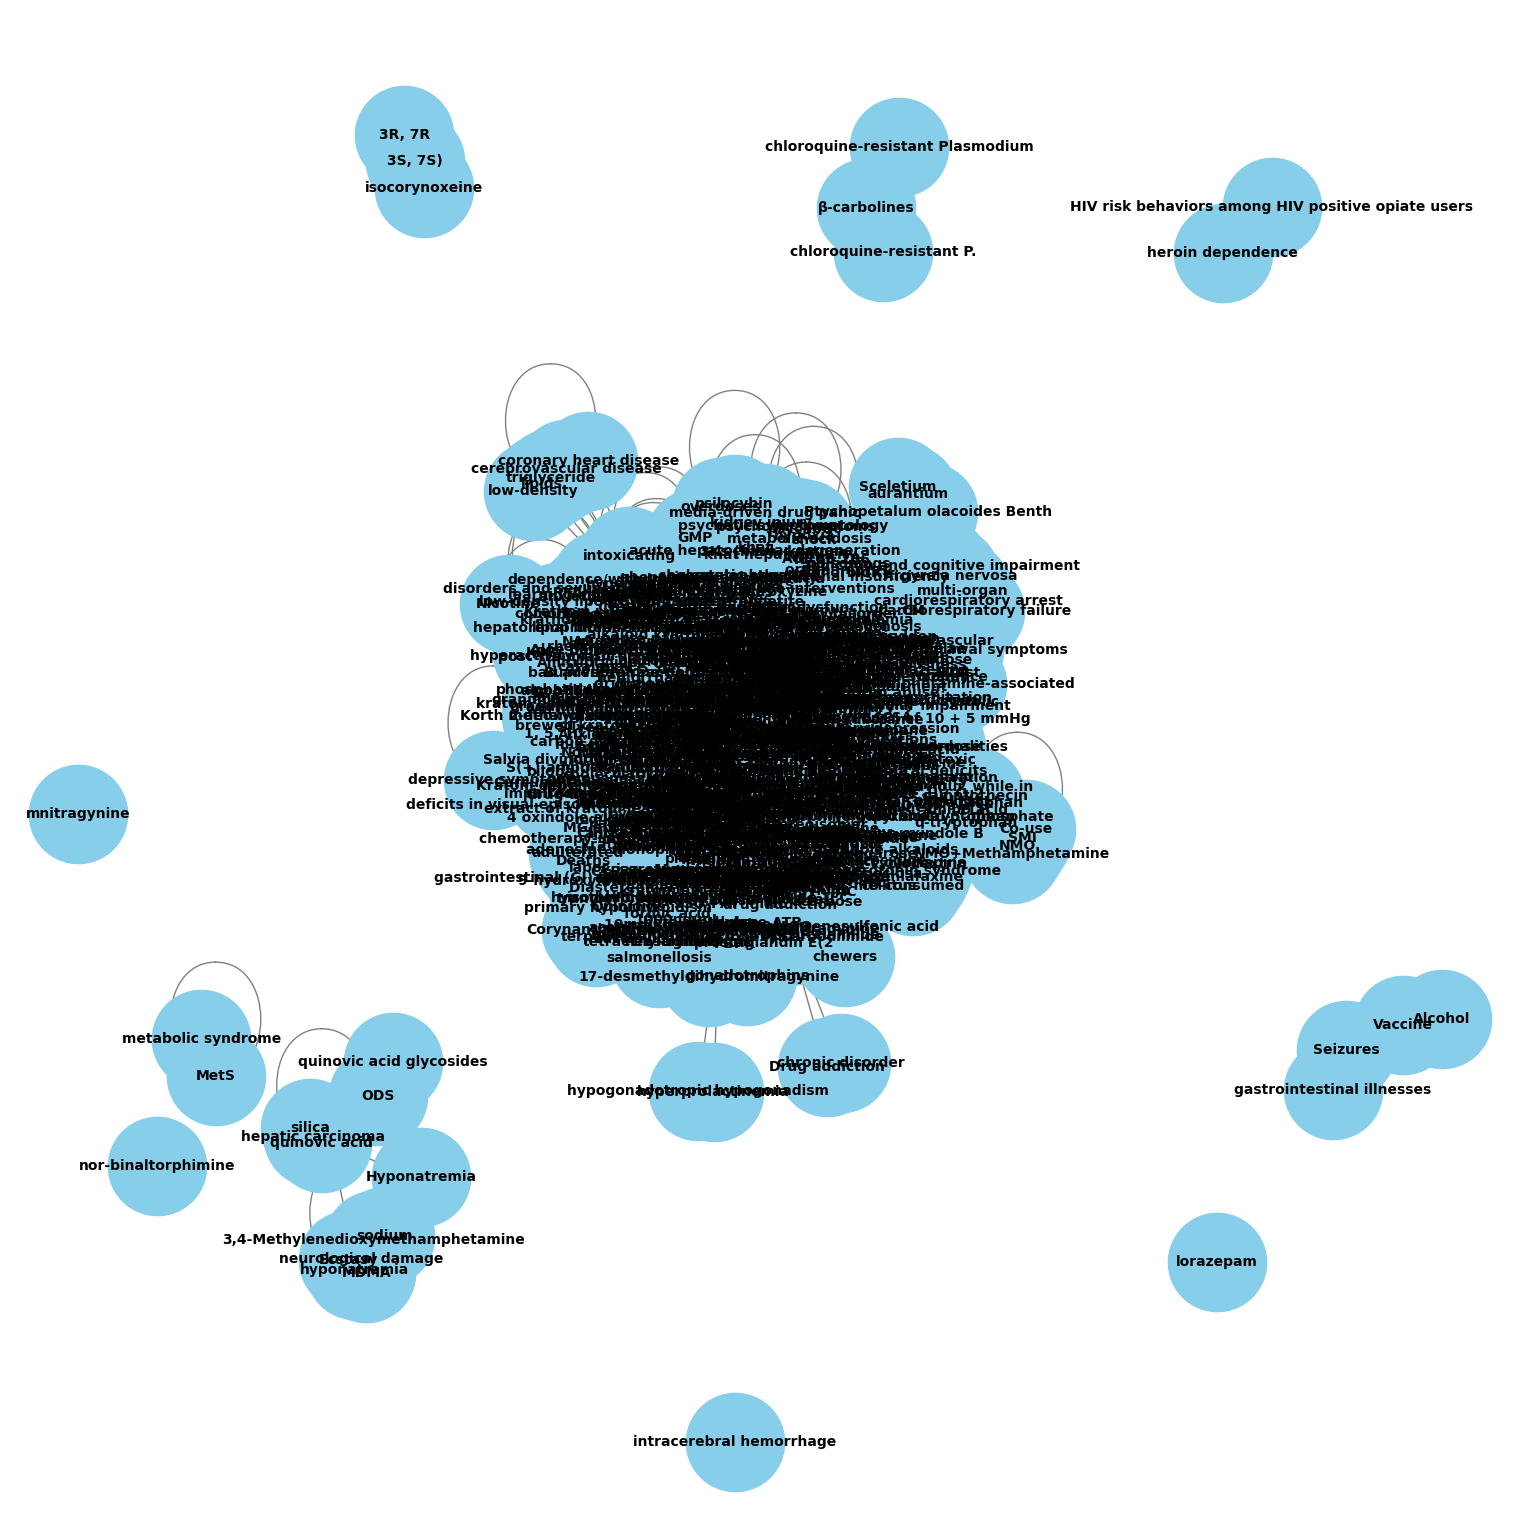

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a graph
G = nx.Graph()

# Add nodes and edges to the graph
for text in sample_transcription:
    doc = nlp(text)
    for ent in doc.ents:
        G.add_node(ent.text, label=ent.label_)
        # Example relationship: entity co-occurrence in the same text
        for other_ent in doc.ents:
            if ent != other_ent:
                G.add_edge(ent.text, other_ent.text)

# Draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray")
plt.show()


In [ ]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy

from spacy.matcher import Matcher
from spacy.tokens import Span

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""  # dependency tag of previous token in the sentence
    prv_tok_text = ""  # previous token in the sentence

    prefix = ""
    modifier = ""

    #############################################################

    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " " + tok.text

            # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " " + tok.text

            ## chunk 3
            if tok.dep_.find("subj") == True:
                ent1 = modifier + " " + prefix + " " + tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""

                ## chunk 4
            if tok.dep_.find("obj") == True:
                ent2 = modifier + " " + prefix + " " + tok.text

            ## chunk 5
            # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
    #############################################################

    return [ent1.strip(), ent2.strip()]

In [ ]:
entity_pairs = []

for i in tqdm(df["abstract"]):
    entity_pairs.append(get_entities(i))

100%|██████████| 395/395 [00:16<00:00, 24.17it/s]


In [ ]:
entity_pairs[10:20]

[['sensitively SUD paucity', 'urgent  effects'],
 ['randomized  trials', 'online kratom toxicities'],
 ['rats  results', 'scientific M. reinforcement'],
 ['CBD', 'MG \n MG change'],
 ['Herein organ we', 'increased healthcare regulation'],
 ['rats  results', 'M. reinforcement'],
 ['healthcare professionals', 'reactions'],
 ['patients  who', 'educational kratom discussions'],
 ['kratom  which', 'numerous  medications'],
 ['also', 'adolescent  brain']]

In [ ]:
def get_relation(sent):

    doc = nlp(sent)

    # Matcher class object
    matcher = Matcher(nlp.vocab)

    #define the pattern
    pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},
            {'POS':'ADJ','OP':"?"}]

    matcher.add("matching_1", [pattern])

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]]

    return(span.text)

In [ ]:
relations = [get_relation(i) for i in tqdm(df["abstract"])]

100%|██████████| 395/395 [00:16<00:00, 23.55it/s]


In [ ]:
pd.Series(relations).value_counts()[:50]

#relations[:50]

,count
suggest,32
CONCLUSIONS,22
\n,13
needed,9
CONCLUSION,9
provide,8
aware,8
highlights,6
indicate,5
used,5


In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
kg_df

,source,target,edge
0,repeated brain administration,kratom decoction kratom evidence,provided
1,remarkable enzyme promiscuity,possibility,suggests
2,reported effect differences,,assess
3,who,pediatric storage exposure,benefit
4,further kratom research,better application,warranted
...,...,...,...
390,online surveillance,rapidity,demonstrates
391,method,effective identification,provides
392,rearing head results,antidepressant mg/kg M. activity,showed
393,variance United article,possible implications,concludes


In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

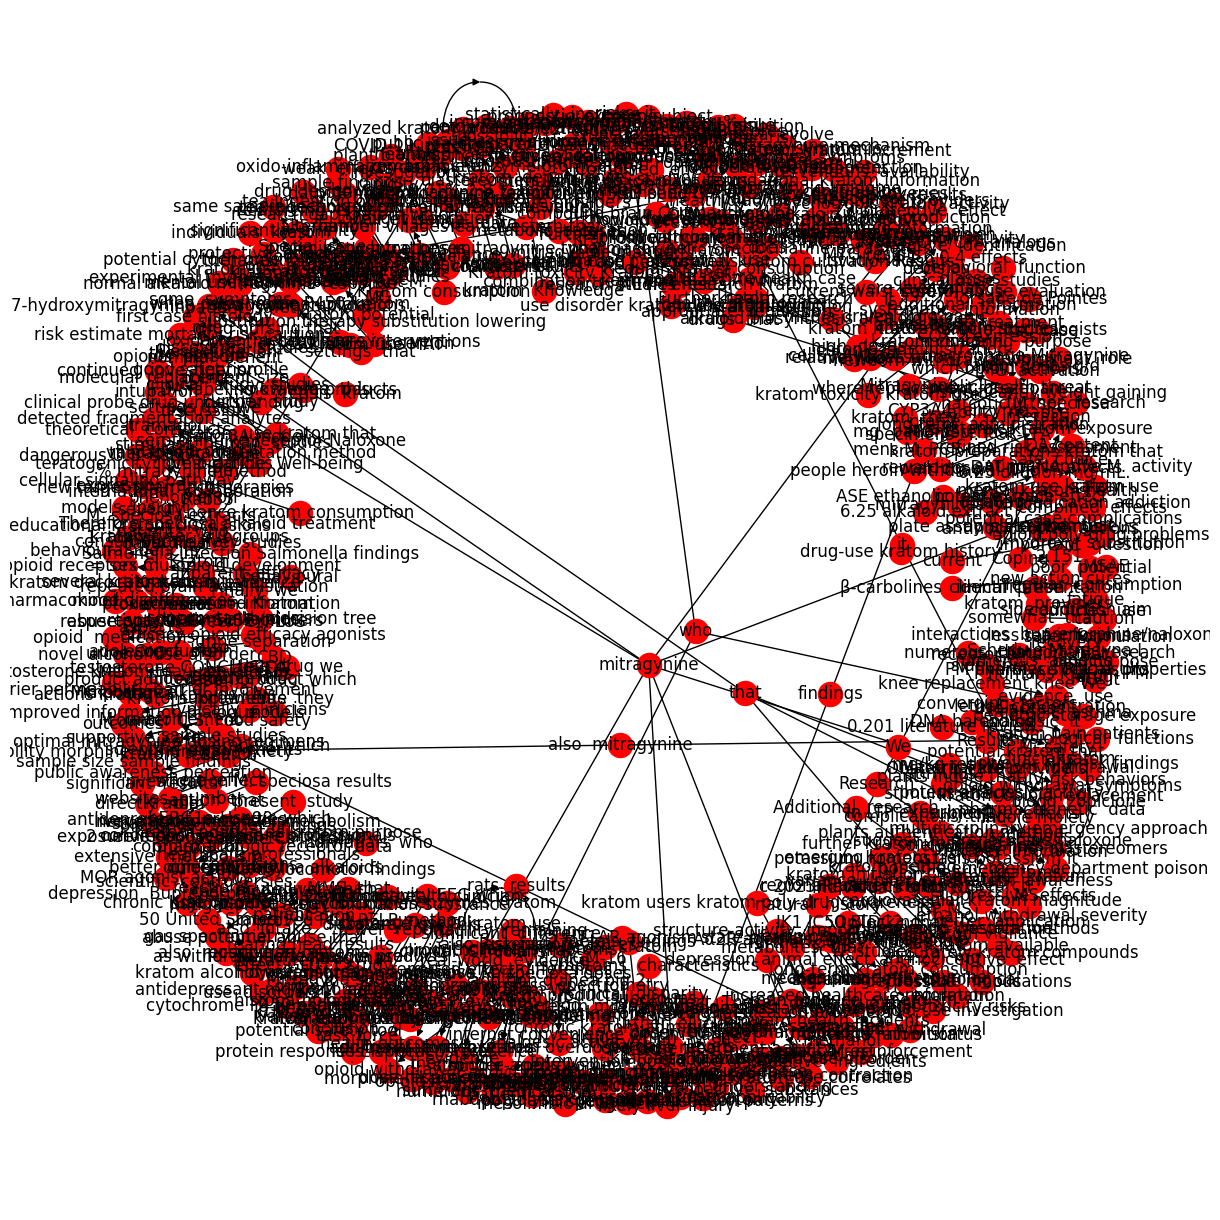

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

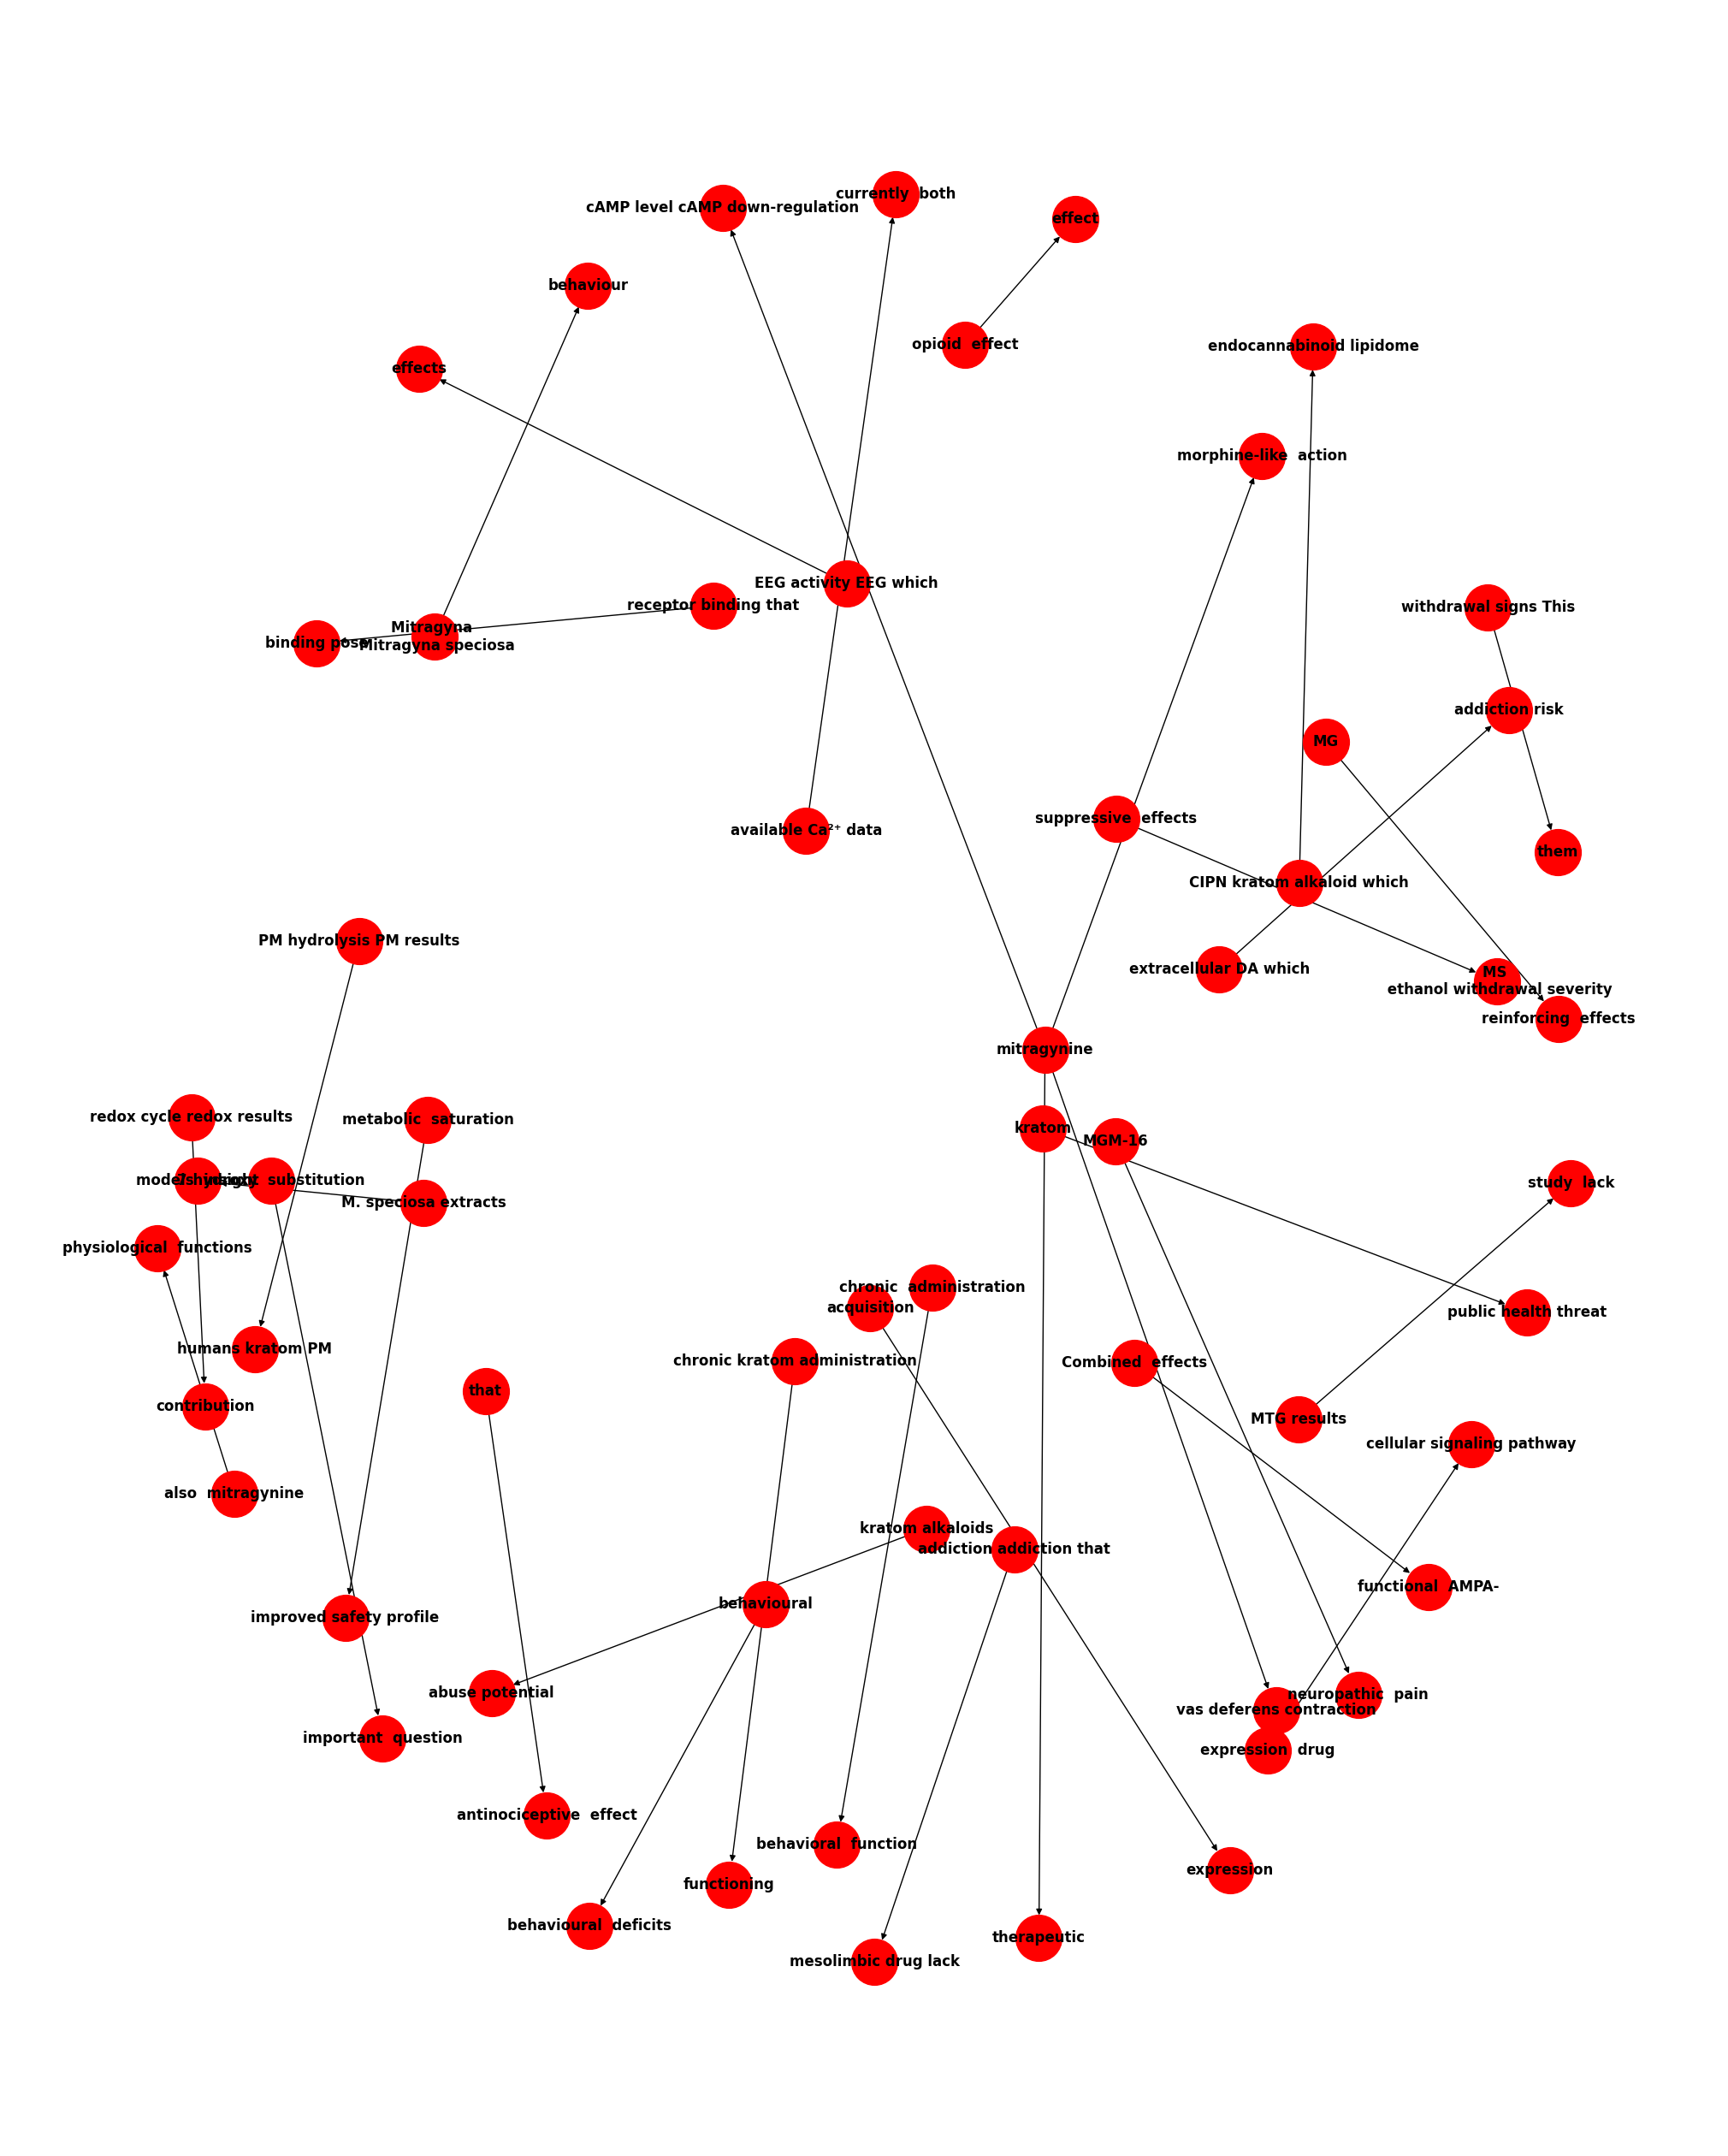

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="suggest"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(20,25))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
plt.show()

In [ ]:
import scispacy
import spacy
nlp = spacy.load("en_ner_bc5cdr_md")

# Extract entities
entities = []

for text in sample_transcription:
    doc = nlp(text)
    for ent in doc.ents:
        entities.append((ent.text, ent.start_char, ent.end_char, ent.label_))

# Create a DataFrame of entities
entities_df = pd.DataFrame(entities, columns=["Entity", "Start Char", "End Char", "Label"])
entities_df.head()


,Entity,Start Char,End Char,Label
0,toxicity,261,269,DISEASE
1,toxicity,344,352,DISEASE
2,Mitragynine,389,400,CHEMICAL
3,uric acid,977,986,CHEMICAL
4,toxicity,1272,1280,DISEASE


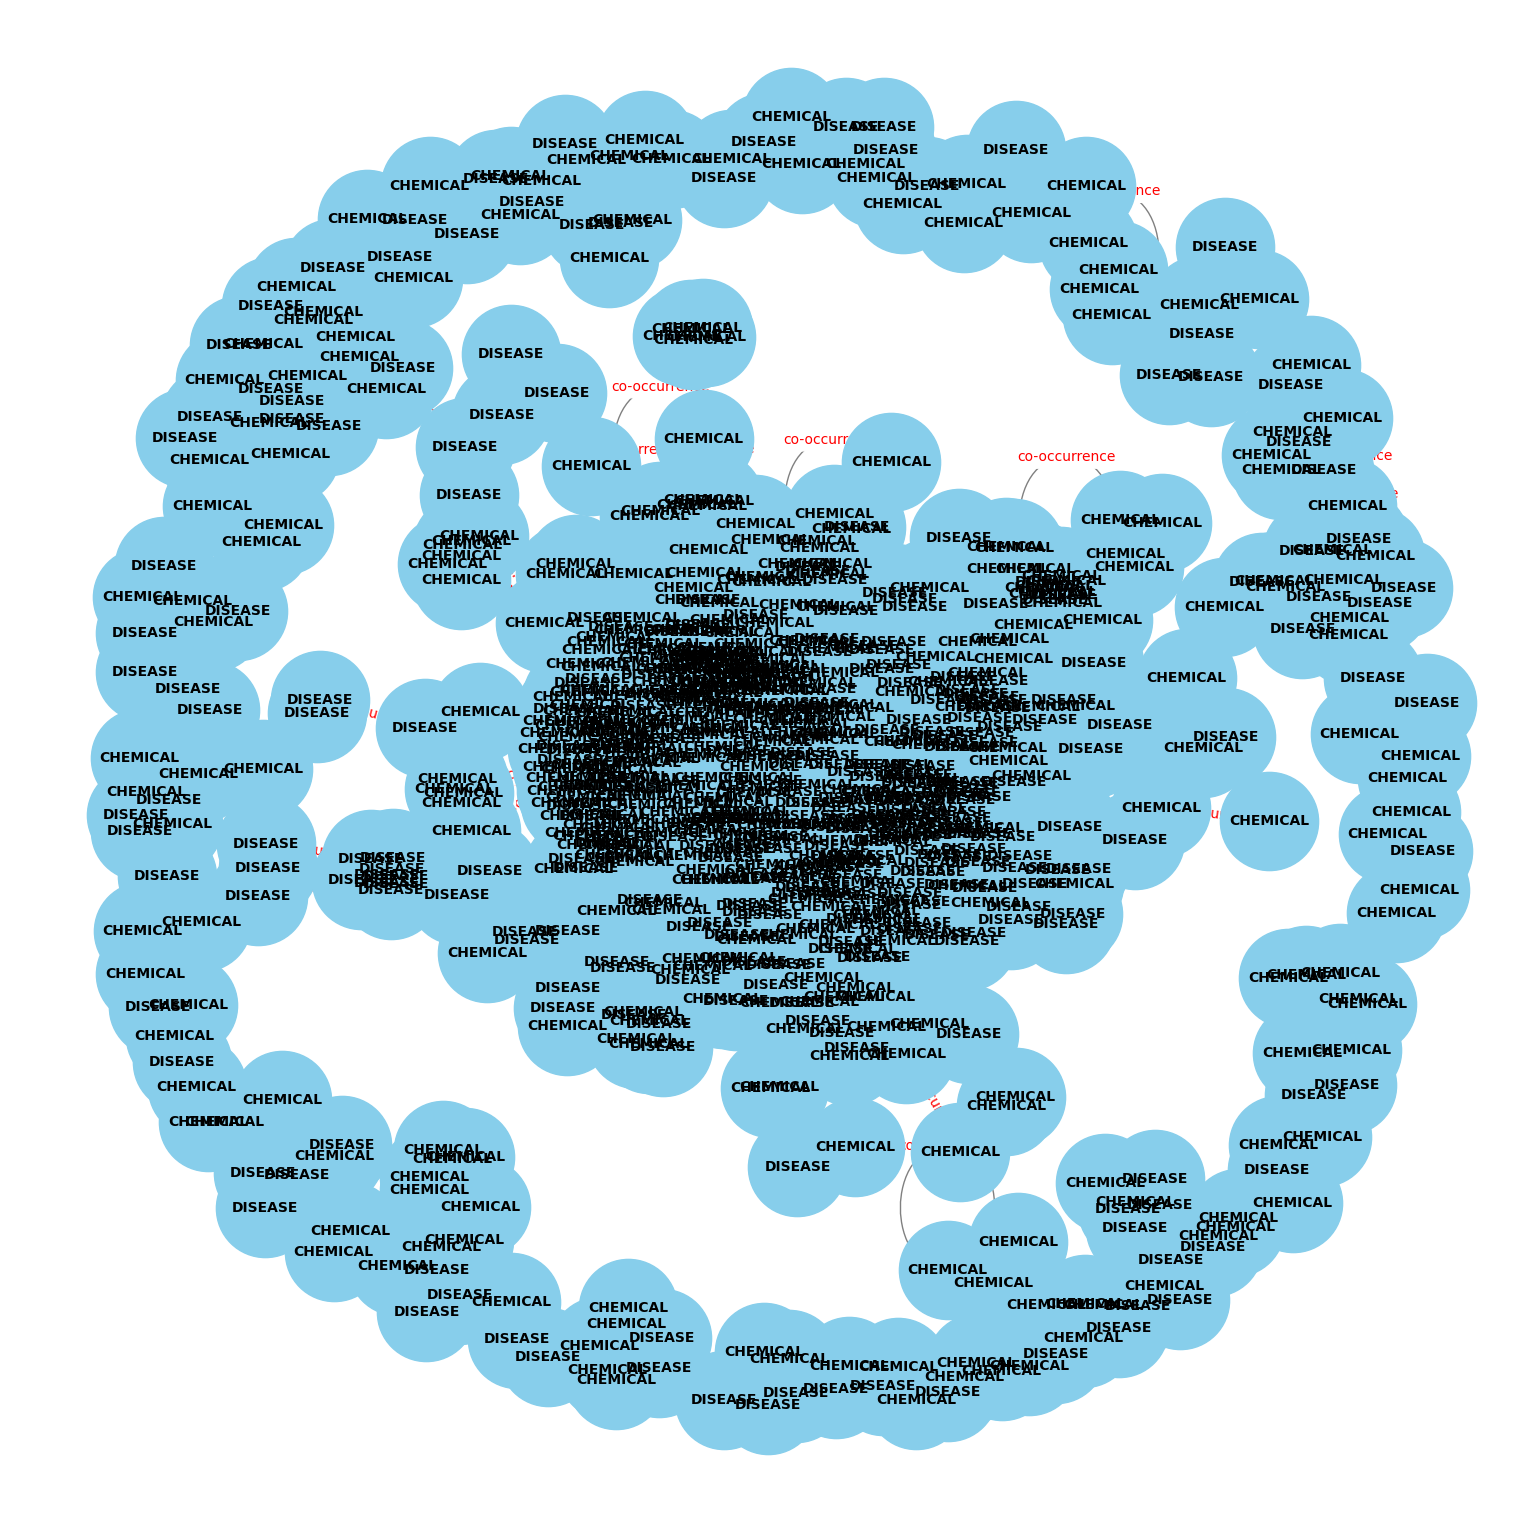

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a graph
G = nx.Graph()

# Add nodes and edges to the graph
for text in sample_transcription:
    doc = nlp(text)
    for sent in doc.sents:
        entities_in_sent = [(ent.text, ent.label_) for ent in sent.ents]
        for i, (entity, label) in enumerate(entities_in_sent):
            G.add_node(entity, label=label)
            for j in range(i + 1, len(entities_in_sent)):
                other_entity, other_label = entities_in_sent[j]
                G.add_edge(entity, other_entity, relationship='co-occurrence')

# Draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.1)
labels = nx.get_node_attributes(G, 'label')
edge_labels = nx.get_edge_attributes(G, 'relationship')

nx.draw(G, pos, with_labels=True, labels=labels, node_size=5000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()


In [ ]:
def extract_entities_and_relations(text):

  for text in sample_transcription:
    doc = nlp(text)
    chemicals = []
    diseases = []
    relations = []

    # Mengumpulkan entitas
    for ent in doc.ents:
        if ent.label_ == "Chemical":
            chemicals.append(ent.text)
        elif ent.label_ == "Disease":
            diseases.append(ent.text)

    # Mencari relasi berdasarkan pola
    for token in doc:
        if token.dep_ == "ROOT":  # Misalnya, ambil kata kerja sebagai akar kalimat
            for child in token.children:
                if child.dep_ in ["prep", "agent"]:  # Mengambil preposisi atau agen
                    for grandchild in child.children:
                        # Mencocokkan Chemical dan Disease
                        if grandchild.text in chemicals and grandchild.head.dep_ == "dobj":
                            # Menambahkan relasi
                            for disease in diseases:
                                relations.append((grandchild.text, disease, token.text))  # (Chemical, Disease, Verb)

    return chemicals, diseases, relations

# Contoh data

chemicals, diseases, relations = extract_entities_and_relations(text=sample_transcription)

entities_df = pd.DataFrame(extract_entities_and_relations, columns=["chemicals", "disease", "relations"])
entities_df.head()




ValueError: DataFrame constructor not properly called!

In [ ]:
def extract_entities_and_relations(text):
  chemicals = []
  diseases = []
  relations = []

  for text in sample_transcription:
    doc = nlp(text)

    # Mengumpulkan entitas
    for ent in doc.ents:
        if ent.label_ == "Chemical":
            chemicals.append(ent.text)
        elif ent.label_ == "Disease":
            diseases.append(ent.text)

    # Mencari relasi berdasarkan pola
    for token in doc:
        if token.dep_ == "ROOT":  # Misalnya, ambil kata kerja sebagai akar kalimat
            for child in token.children:
                if child.dep_ in ["prep", "agent"]:  # Mengambil preposisi atau agen
                    for grandchild in child.children:
                        # Mencocokkan Chemical dan Disease
                        if grandchild.text in chemicals and grandchild.head.dep_ == "dobj":
                            # Menambahkan relasi
                            for disease in diseases:
                                relations.append((grandchild.text, disease, token.text))  # (Chemical, Disease, Verb)

  return chemicals, diseases, relations # Return statement outside the loop

# Call the function and store the results:
chemicals, diseases, relations = extract_entities_and_relations(text=sample_transcription)

# Create the DataFrame using the returned data:
entities_df = pd.DataFrame({"chemicals": chemicals, "disease": diseases, "relations": relations})

entities_df.head()

,chemicals,disease,relations
